# Beispiel 10.2: Konzentrationsführung im halbkontinuierlichen Reaktor
Bearbeitet von Franz Braun

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 138 - 139. Die Nummerierung
der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete
Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

Zunächst werden die benötigten Pakete importiert.

In [1]:
### Import
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In diesem Beispiel wird eine exotherme Parallelreaktion in einem halbkontinuierlichen Rührkesselreaktor betrachtet.

\begin{align*}
\mathrm{R1:} \quad \mathrm{A_1} + \mathrm{A_2} \rightarrow \mathrm{A_3} \qquad &\text{mit} \quad r_1 = k_1 \, c_1^{1,5} \, c_2^{0,5}\\ 
\mathrm{R2:} \quad \mathrm{A_1} + \mathrm{A_2} \rightarrow \mathrm{A_4} \qquad &\text{mit} \quad r_2 = k_2 \, c_1 \, c_2
\end{align*}

Es folgt die Parametrierung der Reaktion mit dimensionslosen Variablen.

In [2]:
beta_1      = 0.2   # Prater-Zahl R1
beta_2      = 0.4   # Prater-Zahl R2
gamma_1     = 20    # dimensionslose Aktivierungsenergie R1
gamma_2     = 20.5  # dimensionslose Aktivierungsenergie R2

theta_K     = 1     # dimensionslose Kühlmitteltemperatur
theta_e     = 1     # dimensionslose Eingangsstromtemperatur 
St          = 3     # Stanton-Zahl
Da          = 0.1   # Damköhler-Zahl

kappa_1     = 0     # Einsatzverhältnis von A1
kappa_2     = 1     # Einsatzverhältnis von A2
kappa_3     = 0     # Einsatzverhältnis von A3
kappa_4     = 0     # Einsatzverhältnis von A4


nu_1        = np.array([-1, -1, 1, 0])  # stöchiometrische Koeffizienten von A1 bis A4 in R1
nu_2        = np.array([-1, -1, 0, 1])  # stöchiometrische Koeffizienten von A1 bis A4 in R2

Die dimensionslose Reaktionsgeschwindigkeit $\omega_1$ der Reaktion R1 ergibt sich durch die Division der Reaktionsgeschwindigkeit $r_1$ durch eine fiktive Anfangsreaktionsgeschwindigkeit $r_{1,\mathrm{v}} = r_1 (T_0, c_{1,\mathrm{v}},c_{2,\mathrm{v}})$:

\begin{align*}
\omega_1 = \frac{r_1}{r_{1,\mathrm{v}}} = \frac{k_1\,c_1^{1,5} \, c_2^{0,5}}{k_{1,\mathrm{v}}\, c_{1,\mathrm{v}}^{1,5}\, c_{2,\mathrm{v}}^{0,5}}.\\
\end{align*}

Mit der Definition des Restanteils $\left(f_i = \frac{c_i}{c_{1,\mathrm{v}}}\right)$ und der Annahme, dass die Konzentrationen der Komponenten $A_1$ und $A_2$ in den Vorlagebhältern gleich groß sind $\left(c_{1,\mathrm{v}} = c_{2,\mathrm{v}}\right)$, lässt sich dieser Ausdruck umschreiben zu:

\begin{align*}
\omega_1 = \frac{k_{0,1}\,\exp{ \left(\frac{-E_\mathrm{A}}{R\,T}\right)}}{k_{0,1}\,\exp{\left(\frac{-E_\mathrm{A}}{R\,T_0}\right)}} f_1^{1,5} \, f_2^{0,5}.
\end{align*}

Folgend wird in diesen Ausdruck die dimensionslose Reaktortemperatur $\left(\vartheta = \frac{T}{T_0}\right)$ und Arrhenius-Zahl $\left(\gamma_j = \frac{E_{\mathrm{A},j}}{R\,T_0}\right)$ eingesetzt und dieser vereinfacht.

\begin{align*}
\omega_1 &= \frac{\exp{ \left(\frac{-E_\mathrm{A}}{R\,T} \frac{T_0}{T_0} \right)}}{\exp{\left(\frac{-E_\mathrm{A}}{R\,T_0}\right)}} f_1^{1,5} \, f_2^{0,5} = \frac{\exp{ \left(\frac{-E_\mathrm{A}}{R\,T_0}\frac{T_0}{T} \right)}}{\exp{\left(\frac{-E_\mathrm{A}}{R\,T_0}\right)}} f_1^{1,5} \, f_2^{0,5} = \frac{\exp{ \left( -\gamma_1 \frac{1}{\vartheta} \right)}} {\exp{\left(-\gamma_1\right)}} f_1^{1,5} \, f_2^{0,5} \\ 
\omega_1 &= \exp{ \left(\gamma_1 -\gamma_1 \frac{1}{\vartheta} \right)} f_1^{1,5} \, f_2^{0,5}
\end{align*}


Die dimensionslose Reaktionsgeschwindigkeit $\omega_2$ der Reaktion R2 ist definiert über:

\begin{align*}
\omega_2 = \frac{r_2}{r_{1,\mathrm{v}}} = \frac{k_2\,c_1 \, c_2}{k_{1,\mathrm{v}}\, c_{1,\mathrm{v}}^{1,5}\, c_{2,\mathrm{v}}^{0,5}}.\\
\end{align*}

Mit den Annahmen gleicher Konzentrationen $c_{i,v}$ der Komponenten $A_1$ und $A_2$ in den Vorlagebhältern und gleicher Frequenzfaktoren $(k_{0,1} = k_{0,2} )$ beider Reaktionen, ergibt sich folgender Ausdruck für $\omega_2$:

\begin{align*}
\omega_1 &= \frac{k_2\,c_1 \, c_2}{k_{1,\mathrm{v}}\, c_{1,\mathrm{v}}^{1,5}\, c_{2,\mathrm{v}}^{0,5}} = \frac{k_{0,1}\,\exp{ \left(\frac{-E_\mathrm{A}}{R\,T}\right)}}{k_{0,2}\,\exp{\left(\frac{-E_\mathrm{A}}{R\,T_0}\right)}}  \frac{k_2\,c_1 \, c_2}{k_{1,\mathrm{v}}\, c_{1,\mathrm{v}}^{2}} = \frac{\exp{ \left(\frac{-E_\mathrm{A}}{R\,T} \frac{T_0}{T_0} \right)}}{\exp{\left(\frac{-E_\mathrm{A}}{R\,T_0}\right)}} f_1 \, f_2 = \frac{\exp{ \left( -\gamma_2 \frac{1}{\vartheta} \right)}} {\exp{\left(-\gamma_1\right)}}  f_1 \, f_2, \\
\omega_1 &= \exp{ \left(\gamma_2 -\gamma_1 \frac{1}{\vartheta} \right)} f_1 \, f_2.
\end{align*}

Die dimensionslosen Reaktionsgeschwindigkeiten beider Reaktionen werden im Folgenden als Funktion _r_berechnen_ implementiert.

In [3]:
def r_brechnen(f,theta):
    '''
    Funktion zur Berechnung der dimensionslosen Reaktionsgeschwindigkeiten omega_1 und omega_2

    Parameter:
    ----------
    gamma_1 : Arrhenius-Zahl der Reaktion 1
    gamma_2 : Arrhenius-Zahl der Reaktion 2
    theta   : dimensionslose Reaktortemperatur 
    f       : Vektor der Restanteile aller Komponenten (A1 bis A4)
    '''


    omega_1 = np.exp(gamma_1 - gamma_1 / theta) * np.power(f[0],1.5) * np.power(f[1],0.5)
    omega_2 = np.exp(gamma_1 - gamma_2 / theta) * f[0] * f[1]
    return np.array((omega_1, omega_2))

In die Materialbilanz (Gl. 10.10a) und in die Energiebilanz (Gl. 10.10b) werden die dimensionslosen Reaktionsgeschwindigkeiten eingesetzt.

\begin{align*}
\frac{\mathrm{d}f_i}{\mathrm{d}\theta} &= \frac{1}{\frac{t_\mathrm{V}}{t_\mathrm{D}}+\theta} (\kappa_i - f_i) + \frac{Da_\mathrm{I}}{r_{1,\mathrm{v}}} \sum^M_{j=1} \nu_{i,j} \, r_j \qquad \text{mit} \quad f_i(0) = \kappa_i\\
&= \frac{1}{\frac{t_\mathrm{V}}{t_\mathrm{D}}+\theta} (\kappa_i - f_i) + Da_\mathrm{I} \, (\nu_{i,1} \, \omega_1 + \nu_{i,2} \, \omega_2)\\
\frac{\mathrm{d}\vartheta}{\mathrm{d}\theta} &= \frac{1}{\frac{t_\mathrm{V}}{t_\mathrm{D}}+\theta} \vartheta_\mathrm{e} + Da_\mathrm{I} \sum^M_{j=1} \beta_j \left( \frac{r_j}{r_{1,\mathrm{v}}} \right) - St (\vartheta - \vartheta_\mathrm{K})\\
&= \frac{1}{\frac{t_\mathrm{V}}{t_\mathrm{D}}+\theta} \vartheta_\mathrm{e} + Da_\mathrm{I} \left( \beta_1 \, \omega_1 +   \beta_2 \, \omega_2  \right) - St (\vartheta - \vartheta_\mathrm{K})
\end{align*}

Die so erhaltenen Differentialgleichungen (DGLs) für werden in der Funktion _Rührkessel_ implementiert.

In [4]:
def Rührkessel(Th, y):
    '''
    Funktion mit der dimensionslosen Material- und Energiebilanz eines Rührkessel-Reaktors
    
    Parameter:
    ----------
    Th      : dimensionslose Zeit
    y       : Vektor mit Restanteilen der Komponenten A1 bis A4 und der dimensionslosen Reaktionstemperatur als letzter Eintrag
    f       : Vektor mit Restanteilen der Komponenten A1 bis A4
    theta   : dimensionslose Reaktionstemperatur
    omega   : Vektor mit den dimensionslosen Reaktionsgeschwindigkeiten der Reaktionen R1 und R2
    dfidTh  : Änderung des Restanteils i mit der dimensionslosen Zeit
    kappa_i : Einsatzverhältnis der Komponente i
    Da      : Damköhler-Zahl
    nu_1    : stöchiometrische Koeffizienten von A1 bis A4 in R1
    nu_2    : stöchiometrische Koeffizienten von A1 bis A4 in R2
    dthdTh  : Änderung der dimensionslosen Reaktionstemperatur mit der dimensionslosen Zeit
    theta_e : dimensionslose Eingangsstromtemperatur 
    beta_j  : Prater-Zahl der Reaktion j
    St      : Stanton-Zahl 
    '''

    # Zuweisen der Konzentrationen und Temperaturen
    f       = y[0:4]
    theta   = y[-1]

    # Berechnen der dimensionslosen Reaktionsgeschwindigkeiten
    omega   = r_brechnen(f, theta)

    # Materialbilanzen
    df1dTh  =  1 / (1 + Th) * (kappa_1 - f[0]) + Da * ( nu_1[0] * omega[0] + nu_2[0] * omega[1])
    df2dTh  =  1 / (1 + Th) * (kappa_2 - f[1]) + Da * ( nu_1[1] * omega[0] + nu_2[1] * omega[1])
    df3dTh  =  1 / (1 + Th) * (kappa_3 - f[2]) + Da * ( nu_1[2] * omega[0] + nu_2[2] * omega[1])
    df4dTh  =  1 / (1 + Th) * (kappa_3 - f[3]) + Da * ( nu_1[3] * omega[0] + nu_2[3] * omega[1])

    # Energiebilanz
    dthdTh  =  1 / (1 + Th) * theta_e          + Da * ( beta_1  * omega[0] + beta_2  * omega[1]) - St * (theta - theta_K)

    return np.hstack((df1dTh,df2dTh,df3dTh,df4dTh,dthdTh))

Die DGLs werden mit dem solver _solve\_ivp_ gelöst.

In [5]:
t_span  = np.array([0, 1])                          # dimensionslose Zeitspanne 
t_eval  = np.linspace(t_span[0], t_span[1], 100)    # Diskretisierung 
y_0     = np.array([1, .0, .0, .0, 1])              # Anfangsbedingungen bei theta = 0 : Restanteile der Edukte und dimensionslose Reaktionstemperatur
                         
sol     = solve_ivp(Rührkessel, t_span, y_0, t_eval = t_eval, method = 'LSODA', rtol = 1e-5)

# Ausgabe der Solver-Nachricht, wenn der Solver die DGL nicht lösen konnte
if sol.success != True:
    print(sol.success)
    print(sol.message)

Im Folgenden werden die Restanteile und die dimensionslose Reaktionstemperatur grafisch veranschaulicht.

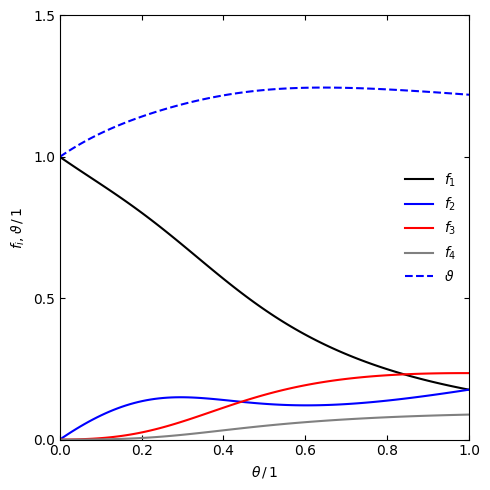

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.plot(sol.t, sol.y[0], color = 'black', label = r'$f_1$')
ax.plot(sol.t, sol.y[1], color = 'blue', label = r'$f_2$')
ax.plot(sol.t, sol.y[2], color = 'red', label = r'$f_3$')
ax.plot(sol.t, sol.y[3], color = 'grey', label = r'$f_4$')
ax.plot(sol.t, sol.y[4], color = 'blue', label = r'$\vartheta$', linestyle = '--')
ax.tick_params(axis="y",direction="in", right = True)
ax.tick_params(axis="x",direction="in", top = True)
ax.set_xticks(np.arange(0, 1.1, step = 0.2))
ax.set_yticks(np.arange(0, 1.51, step = 0.5))
ax.set_ylabel(r'$f_i,\vartheta\,/\,1$')
ax.set_xlabel(r'$\theta \,/\,1$')
ax.set_xlim(0,1)
ax.set_ylim(0,1.5)
plt.legend(frameon = False)
plt.tight_layout()
plt.show()